# Explore structured prediction tasks and compare different prediction methods

**Authors: maria.boritchev@telecom-paris.fr and matthieu.labeau@telecom-paris.fr**

## Objectives:

- Explore Part-of-Speech (POS) tagging, in particular through tools integrated to the ```nltk``` library.

- Use the notion of _chunking_ and its different implementations and explore sentence structure.

- Implement a BIO tagging for POS and compare our implementation with tools integrated to the ```nltk``` library.

- Explore Named Entity Recognition (NER) with tools integrated to the ```nltk``` library and ```spaCy``` visualisations.

- Compare these tools with a neural network implementation using BERT. 

- Throughout this lab, we will use several datasets: ```nlp-getting-started```, ```entity-annotated-corpus```, and ```wikibooks-dataset```. These datasets need to be downloaded from the course page.

In [2]:
# The main packages needed for this lab:
import numpy as np
import pandas as pd
import nltk 
import os

In this lab, we will first use the functions ```word_tokenize``` and ```pos_tag``` for the POS tagging task. 

### Obtaining and exploring the data
We start from the beginning with the ```nlp-getting-started``` dataset. 

In [3]:
# Read data from nlp-getting-started:
nlp_start_df = pd.read_csv('nlp-getting-started/train.csv')

Explore the data directories and get familiar with their contents and type: how is the data organised? 

<span style="color:red">Questions:</span> What type of natural language data are we working with (sentences, words)? What are the sources and languages of the data?

In [4]:
# Examine example sentences:
for i in range (0,10):
    print(i, ":", nlp_start_df["text"][i])

0 : Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all
1 : Forest fire near La Ronge Sask. Canada
2 : All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected
3 : 13,000 people receive #wildfires evacuation orders in California 
4 : Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school 
5 : #RockyFire Update => California Hwy. 20 closed in both directions due to Lake County fire - #CAfire #wildfires
6 : #flood #disaster Heavy rain causes flash flooding of streets in Manitou, Colorado Springs areas
7 : I'm on top of the hill and I can see a fire in the woods...
8 : There's an emergency evacuation happening now in the building across the street
9 : I'm afraid that the tornado is coming to our area...


**We are working with small texts more or less structured. We can imagine it coming from tweeter or some other socials networks. The posts are in english and contain abbreviations, slang or hashtags.**

<span style="color:green">To code:</span> Using the functions ```word_tokenize``` and ```pos_tag``` of ```nltk```, tokenize an example sentence and apply POS tagging to it.

In [5]:
from nltk import word_tokenize, pos_tag
# Tokenize a sentence and apply POS tagging:
sentences = [s for s in nlp_start_df["text"][0:10]]
tokens = [word_tokenize(s) for s in sentences]
pos = [pos_tag(t) for t in tokens]
print(pos[0])

[('Our', 'PRP$'), ('Deeds', 'NNS'), ('are', 'VBP'), ('the', 'DT'), ('Reason', 'NNP'), ('of', 'IN'), ('this', 'DT'), ('#', '#'), ('earthquake', 'NN'), ('May', 'NNP'), ('ALLAH', 'NNP'), ('Forgive', 'NNP'), ('us', 'PRP'), ('all', 'DT')]


<span style="color:red">Question:</span> What is the set of POS-tags used by the ```pos_tag``` function?

**The set of POS-tags used by the pos_tag function is the Penn Treebank POS tagset.**

As we discussed during the lecture, there can be different sets of POS-tags. The following shows you the documentation for the ```UPENN``` tagset.

In [6]:
nltk.download('tagsets')

nltk.help.upenn_tagset('NN')
nltk.help.upenn_tagset('IN')
nltk.help.upenn_tagset('DT')

NN: noun, common, singular or mass
    common-carrier cabbage knuckle-duster Casino afghan shed thermostat
    investment slide humour falloff slick wind hyena override subhumanity
    machinist ...
IN: preposition or conjunction, subordinating
    astride among uppon whether out inside pro despite on by throughout
    below within for towards near behind atop around if like until below
    next into if beside ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those


[nltk_data] Downloading package tagsets to
[nltk_data]     C:\Users\matsa\AppData\Roaming\nltk_data...
[nltk_data]   Package tagsets is already up-to-date!


<span style="color:green">To code:</span>  Produce a different POS tagging of the same sentence using a different set of POS-tags of your choice.

In [7]:
# Tokenize the sentence and apply a different set of POS-tags of your choice:
nltk.download('universal_tagset')
pos2 = [pos_tag(t, tagset='universal') for t in tokens]
print(pos[0])


[('Our', 'PRP$'), ('Deeds', 'NNS'), ('are', 'VBP'), ('the', 'DT'), ('Reason', 'NNP'), ('of', 'IN'), ('this', 'DT'), ('#', '#'), ('earthquake', 'NN'), ('May', 'NNP'), ('ALLAH', 'NNP'), ('Forgive', 'NNP'), ('us', 'PRP'), ('all', 'DT')]


[nltk_data] Downloading package universal_tagset to
[nltk_data]     C:\Users\matsa\AppData\Roaming\nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!


### Chunking
_Chunking_  is a process of grouping small pieces of information into large units. The primary use of chunking in the context of POS-tagging is in building sub-syntactic trees, using POS-tags-based grammars, implemented using _regular expressions_. The resulting subsentences are called _chunks_. For example, we can use chunking to subdivide a sentence in groups of _noun phrases_ (NPs). There are no pre-defined rules or grammars for chunking, these need to be implemented using regular expressions depending on our need. For example, if we want to chunk **only** ```NN``` tags, we need to use the pattern ````mychunk:{<NN>}````. Conversly, if we want to chunk **all types of tags** which start with 'NN', we'll use `mychunk:{<NN.*>}`.

<span style="color:green">To code:</span>  Apply the chunking method to a sentence from the ```nlp-getting-started``` dataset.

After Chunking:
 (S
  Our/PRP$
  Deeds/NNS
  are/VBP
  the/DT
  Reason/NNP
  of/IN
  this/DT
  #/#
  (mychunk earthquake/NN)
  May/NNP
  ALLAH/NNP
  Forgive/NNP
  us/PRP
  all/DT)


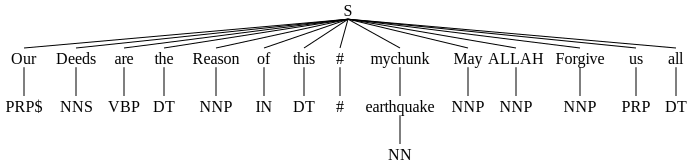

In [8]:
from nltk import RegexpParser
from nltk.draw.tree import TreeView
from IPython.display import Image
import svgling

sentence = pos[0]

# Chunk all nouns from 'sentence' sentence
patterns= """mychunk:{<NN>+}"""
chunker = RegexpParser(patterns)
output = chunker.parse(sentence)
print("After Chunking:\n",output)
svgling.draw_tree(output)

<span style="color:green">To code:</span>  Produce a chunking of the same sentence retrieving all the adjacence nouns (noun-based tags).

After Chunking:
 (S
  Our/PRP$
  (mychunk Deeds/NNS)
  are/VBP
  the/DT
  (mychunk Reason/NNP)
  of/IN
  this/DT
  #/#
  (mychunk earthquake/NN May/NNP ALLAH/NNP Forgive/NNP)
  us/PRP
  all/DT)


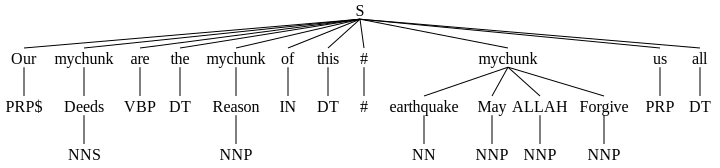

In [9]:
# Chunk all adjacence nouns from 'sentence' sentence
sentence = pos[0]

patterns= """mychunk:{<NN.*>+}"""
chunker = RegexpParser(patterns)
output = chunker.parse(sentence)
print("After Chunking:\n",output)
svgling.draw_tree(output)

Chunking can also be done using BIO algorithm: ```B```eginning of a chunk, ```I```inside of a chunk, ```O```utside of a chunk.

In [10]:
from nltk.chunk import conlltags2tree, tree2conlltags
from pprint import pprint # To display the list nicely

iob_tagged = tree2conlltags(output)
iob_tagged

[('Our', 'PRP$', 'O'),
 ('Deeds', 'NNS', 'B-mychunk'),
 ('are', 'VBP', 'O'),
 ('the', 'DT', 'O'),
 ('Reason', 'NNP', 'B-mychunk'),
 ('of', 'IN', 'O'),
 ('this', 'DT', 'O'),
 ('#', '#', 'O'),
 ('earthquake', 'NN', 'B-mychunk'),
 ('May', 'NNP', 'I-mychunk'),
 ('ALLAH', 'NNP', 'I-mychunk'),
 ('Forgive', 'NNP', 'I-mychunk'),
 ('us', 'PRP', 'O'),
 ('all', 'DT', 'O')]

<span style="color:green">To code:</span> Implement a tree-crawling retrieving the list of triples ```('word','POS-tag','BIO-tag')``` from ```chunker.parse``` output trees. 

In [53]:
list(output[4])

[('photo', 'NN')]

In [11]:
# Tree crawler retrieval of triples from chunker.parser output trees

from nltk.tree import Tree
def extract_triples(tree):
    tree = list(tree)
    triples = []
    for subtree in tree:
        if isinstance(subtree, Tree):
            if subtree.label() == 'mychunk':
                for i, leaf in enumerate(subtree.leaves()):
                    if i == 0:
                        triples.append((leaf[0], leaf[1], 'B'))
                    else:
                        triples.append((leaf[0], leaf[1], 'I'))
        else:
            triples.append((subtree[0], subtree[1], 'O'))
    return triples

iob_tagged = extract_triples(output)
iob_tagged 

[('Our', 'PRP$', 'O'),
 ('Deeds', 'NNS', 'B'),
 ('are', 'VBP', 'O'),
 ('the', 'DT', 'O'),
 ('Reason', 'NNP', 'B'),
 ('of', 'IN', 'O'),
 ('this', 'DT', 'O'),
 ('#', '#', 'O'),
 ('earthquake', 'NN', 'B'),
 ('May', 'NNP', 'I'),
 ('ALLAH', 'NNP', 'I'),
 ('Forgive', 'NNP', 'I'),
 ('us', 'PRP', 'O'),
 ('all', 'DT', 'O')]

# Named Entity Recognition (NER)

NER is also implemented in ```nltk```, using chunking: the ```ne_chunk()``` method in the ```nltk.chunk``` module. 

<span style="color:green">To code:</span>  Implement NER on the same sentence with the method showcased below.

In [12]:
nltk.download('maxent_ne_chunker')
nltk.download('words')
from nltk.chunk import ne_chunk

def extract_ne(trees, labels):
    
    ne_list = []
    for tree in trees:
        if hasattr(tree, 'label'):
            if tree.label() in labels:
                ne_list.append(tree)
    
    return ne_list

# NER on 'sentence' sentence    
sentence = sentences[0]            
ne_res = ne_chunk(pos_tag(word_tokenize(sentence)))
labels = ['ORGANIZATION']

print(extract_ne(ne_res, labels))

[Tree('ORGANIZATION', [('Reason', 'NNP')])]


[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\matsa\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\matsa\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


<span style="color:red">Questions:</span> What other labels are available?

**PERSON, LOCATION, GPE, FACILITY, MONEY, DATE, TIME, PERCENT are also available.**

<span style="color:green">To code:</span> Implement a NE extraction using two or more different labels. 

In [13]:
# NER using two or more different labels

def extract_ne(trees, labels):
    
    ne_list = []
    for tree in trees:
        if hasattr(tree, 'label'):
            if tree.label() in labels:
                ne_list.append(tree)
    
    return ne_list

# NER on 'sentence' sentence    
sentence = sentences[1]            
ne_res = ne_chunk(pos_tag(word_tokenize(sentence)))
labels = ['ORGANIZATION', 'PERSON', 'GPE']

print(extract_ne(ne_res, labels))

[Tree('GPE', [('Forest', 'NNP')]), Tree('PERSON', [('La', 'NNP'), ('Ronge', 'NNP'), ('Sask', 'NNP')]), Tree('PERSON', [('Canada', 'NNP')])]


## NER and ```spaCy```

```spaCy``` module also contains a statistical NER system. It is trained to identify named and numeric entities, such as companies, locations, organizations and products. First, we need more complex data. 

In [14]:
import sqlite3

cnx = sqlite3.connect('wikibooks.sqlite')
df_wikibooks = pd.read_sql_query("SELECT * FROM en", cnx)
df_wikibooks.head()

,title,url,abstract,body_text,body_html
0,Wikibooks: Radiation Oncology/NHL/CLL-SLL,https://en.wikibooks.org/wiki/Radiation_Oncolo...,Chronic Lymphocytic Leukemia and Small Lymphoc...,Front Page: Radiation Oncology | RTOG Trials |...,"<div class=""mw-parser-output""><table width=""10..."
1,Wikibooks: Romanian/Lesson 9,https://en.wikibooks.org/wiki/Romanian/Lesson_9,==Băuturi/Beverages==,Băuturi/Beverages[edit | edit source]\nTea : C...,"<div class=""mw-parser-output""><h2><span id=""B...."
2,Wikibooks: Karrigell,https://en.wikibooks.org/wiki/Karrigell,Karrigell is an open Source Python web framewo...,Karrigell is an open Source Python web framewo...,"<div class=""mw-parser-output""><p>Karrigell is ..."
3,Wikibooks: The Pyrogenesis Engine/0 A.D./GuiSe...,https://en.wikibooks.org/wiki/The_Pyrogenesis_...,====setupUnitPanel====,setupUnitPanel[edit | edit source]\nHelper fun...,"<div class=""mw-parser-output""><h4><span class=..."
4,Wikibooks: LMIs in Control/pages/Exterior Coni...,https://en.wikibooks.org/wiki/LMIs_in_Control/...,== The Concept ==,Contents\n\n1 The Concept\n2 The System\n3 The...,"<div class=""mw-parser-output""><div id=""toc"" cl..."


The following displays ```spaCy```'s NER on a given document from the ```wikibooks``` dataset.

In [19]:
import spacy
spacy.cli.download('en_core_web_sm')
nlp = spacy.load("en_core_web_sm")
wiki_ex = df_wikibooks.iloc[11]['body_text']
print(wiki_ex)
doc = nlp(wiki_ex)
doc 

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
This Wikibooks page is a fact sheet and analysis on the article "Habitual physical activity in children and adolescents with cystic fibrosis" about how exercise is related to the disease Cystic Fibrosis.

Contents

1 Background of this research
2 Where is the research from ?
3 What kind of research was this?
4 What did the research involve?

4.1 Pulmonary Function testing
4.2 Pros / Cons of this test


5 What were the basic results?
6 What conclusion can we take from this research ?
7 Practical Advice
8 Further information/ Resources

8.1 Cystic Fibrosis Australia
8.2 Cystic Fibrosis's National Ambassador Nathan Charles


9 References



Background of this

This Wikibooks page is a fact sheet and analysis on the article "Habitual physical activity in children and adolescents with cystic fibrosis" about how exercise is related to the disease Cystic Fibrosis.

Contents

1 Background of this research
2 Where is the research from ?
3 What kind of research was this?
4 What did the research involve?

4.1 Pulmonary Function testing
4.2 Pros / Cons of this test


5 What were the basic results?
6 What conclusion can we take from this research ?
7 Practical Advice
8 Further information/ Resources

8.1 Cystic Fibrosis Australia
8.2 Cystic Fibrosis's National Ambassador Nathan Charles


9 References



Background of this research[edit | edit source]
The research was about the effects of taking part in exercise constantly or making it a habit in the population of children and teens that are severing from the genetic condition cystic Fibrosis.
What is  Cystic Fibrosis
It is a genetic condition, affecting lungs and digestion. Unfortunately, there is no 

In [20]:
print('All entity types that spacy recognised from the document above')
set([ent.label_ for ent in doc.ents])

All entity types that spacy recognised from the document above


{'CARDINAL',
 'DATE',
 'GPE',
 'NORP',
 'ORG',
 'PERCENT',
 'PERSON',
 'QUANTITY',
 'TIME',
 'WORK_OF_ART'}

<span style="color:red">Questions:</span> What other labels are available?

<span style="color:green">To code:</span> Print out all persons and organizations recognised in the document.

In [23]:
# Print out all persons and organisations from the document above
nlp = spacy.load("en_core_web_sm")
lab = nlp.get_pipe("ner").labels

for label in lab:
    if label not in set([ent.label_ for ent in doc.ents]):
        print(label)


EVENT
FAC
LANGUAGE
LAW
LOC
MONEY
ORDINAL
PRODUCT


**Other labels rrecognised by spaCy are listed above.**

```spaCy``` also features a very nice visualization tool for NE. The following showcases this tool on a Wikibooks page.

In [24]:
from spacy import displacy
displacy.render(doc, style="ent", jupyter=True)

<span style="color:red">Questions:</span> Can you see problems in this annotation? What adaptations would you suggest?

**Un même terme peut être annoté de plusieurs façons différentes. Il faudrait peut-être choisir une seule annotation par terme. (CF classé dans ORG et dans GPE).**

### Comparing accuracies with a pre-trained model

We will now use a pre-trained BERT-based model from the ```transformers``` library. Assuming we use the model as is, and do not do any fine-tuning, we can use the high-level interface from the library, ```pipeline```.
First, let's look at the model and the tags it uses. 

In [25]:
from transformers import AutoModelForTokenClassification, AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("dslim/bert-base-NER")
model = AutoModelForTokenClassification.from_pretrained("dslim/bert-base-NER")
print('Entities from the pretrained model')
print(model.config.id2label)

c:\Users\matsa\AppData\Local\Programs\Python\Python311\Lib\site-packages\transformers\utils\generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(


tokenizer_config.json:   0%|          | 0.00/59.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/829 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

c:\Users\matsa\AppData\Local\Programs\Python\Python311\Lib\site-packages\transformers\utils\generic.py:309: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(
c:\Users\matsa\AppData\Local\Programs\Python\Python311\Lib\site-packages\transformers\utils\generic.py:309: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(


model.safetensors:   0%|          | 0.00/433M [00:00<?, ?B/s]

Some weights of the model checkpoint at dslim/bert-base-NER were not used when initializing BertForTokenClassification: ['bert.pooler.dense.weight', 'bert.pooler.dense.bias']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Entities from the pretrained model
{0: 'O', 1: 'B-MISC', 2: 'I-MISC', 3: 'B-PER', 4: 'I-PER', 5: 'B-ORG', 6: 'I-ORG', 7: 'B-LOC', 8: 'I-LOC'}


Now, let's look at one last dataset. It contains **reference tags** for every word in the sentences. However, the tagset is not exactly the same - we will need to use a mapping. For simplicity, we will only look at the *Location* tags in what follows ! 

In [26]:
# Let's re-format the dataset for convenience
df = pd.read_csv('./entity-annotated-corpus/ner_dataset.csv', encoding='unicode_escape')
df['Sentence #'] = df['Sentence #'].ffill()
# Grouping sentences together into one sentence by row, for words, pos, tags
df_gr = df.groupby('Sentence #').agg(lambda x: list(x))
# Just renaming indexes
df_gr.index  = [int(s[9:]) for s in df_gr.index]

In [27]:
# What's the tagset ? 
tags = []
for tag in df_gr['Tag'].to_list():
    tags.extend(tag)
print('Entities in our data set')
print(set(tags))

Entities in our data set
{'B-tim', 'I-tim', 'I-art', 'B-art', 'I-nat', 'B-gpe', 'B-per', 'I-org', 'I-gpe', 'O', 'I-geo', 'I-eve', 'B-nat', 'I-per', 'B-eve', 'B-geo', 'B-org'}


<span style="color:red">Questions:</span> What is the tagset used in the previous cell?

**Le tagset associé aux étiquettes NER suit le schéma BIO**

In [33]:
# Let's look at an example ! 
from transformers import pipeline
example = df_gr.loc[1]['Word']
example_tag = df_gr.loc[1]['Tag']
NER_model = pipeline("ner",
                     model="dslim/bert-base-NER",
                     grouped_entities=True)
print("Output from the pipeline containing the BERT-based model:")
ner_output = NER_model(example)
print(ner_output)
print("Reference tag list")
print(example_tag)

Some weights of the model checkpoint at dslim/bert-base-NER were not used when initializing BertForTokenClassification: ['bert.pooler.dense.weight', 'bert.pooler.dense.bias']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Output from the pipeline containing the BERT-based model:
[[], [], [], [], [], [], [{'entity_group': 'LOC', 'score': 0.9994006, 'word': 'London', 'start': 0, 'end': 6}], [], [], [], [], [], [{'entity_group': 'LOC', 'score': 0.99984574, 'word': 'Iraq', 'start': 0, 'end': 4}], [], [], [], [], [], [{'entity_group': 'MISC', 'score': 0.9996024, 'word': 'British', 'start': 0, 'end': 7}], [], [], [], [], []]
Reference tag list
['O', 'O', 'O', 'O', 'O', 'O', 'B-geo', 'O', 'O', 'O', 'O', 'O', 'B-geo', 'O', 'O', 'O', 'O', 'O', 'B-gpe', 'O', 'O', 'O', 'O', 'O']


<span style="color:green">To code:</span> Assuming the following mapping between the tags from the dataset and those output by the BERT model:
```python
entity_mapping = {
'O': 'O',
'B-per': 'B-PER',
'I-per': 'I-PER',
'B-org': 'B-ORG',
'I-org': 'I-ORG',
'B-geo': 'B-LOC',
'I-geo': 'I-LOC',
'B-art': 'B-MISC', 'B-eve': 'B-MISC', 'B-gpe': 'B-MISC', 'B-nat': 'B-MISC', 'B-tim': 'B-MISC',
'I-art': 'I-MISC', 'I-eve': 'I-MISC', 'I-gpe': 'I-MISC', 'I-nat': 'I-MISC', 'I-tim': 'I-MISC',
}
``` 

Assuming you can use the less precise tagset (from the BERT model),
Find a way to compute the accuracy of the BERT-based model on all **complete locations** on the dataset. Compare with the same value obtained for the NLTK model !

In [35]:
from sklearn.metrics import accuracy_score
NER_model = pipeline("ner",
                            model="dslim/bert-base-NER",
                            grouped_entities=True)
tags = ['B-geo', 'I-geo', 'B-LOC', 'I-LOC']
for i,w in enumerate(df_gr['Word'].to_list()):
    if df_gr.loc[i]['Tag'] in tags:        
        ner_output = NER_model(w)
        break        

# print("Output from the pipeline containing the BERT-based model:")
# ner_output = NER_model(example)
# print(ner_output)
# print("Reference tag list")
# print(example_tag)

Some weights of the model checkpoint at dslim/bert-base-NER were not used when initializing BertForTokenClassification: ['bert.pooler.dense.weight', 'bert.pooler.dense.bias']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
c:\Users\matsa\AppData\Local\Programs\Python\Python311\Lib\site-packages\transformers\pipelines\token_classification.py:169: UserWarning: `grouped_entities` is deprecated and will be removed in version v5.0.0, defaulted to `aggregation_strategy="AggregationStrategy.SIMPLE"` instead.
  warnings.warn(


KeyError: 0